<a href="https://colab.research.google.com/github/prashantiyaramareddy/AI-ML-Learnings/blob/master/ComputerVision/CNNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a Convolutional Neural Network from Scratch with Python and Pytorch

Convolutional Neural Networks (CNNs) have revolutionized image-related tasks in deep learning. In this guide, you’ll learn how to build a CNN from scratch in PyTorch, train it on a real-world dataset (we will use Fashion MNIST), evaluate its performance, and visualize results.

What is a CNN and Why Use It for Image Tasks?
CNNs are specialized neural networks designed to work with image data. Unlike traditional neural networks, CNNs automatically learn spatial hierarchies of features using layers such as:

* Convolutional layers: extract features like edges and textures.
* Pooling layers: downsample spatial dimensions.
* Fully connected layers: perform final classification.
They are effective in:

Image classification
Object detection
Face recognition
Medical image analysis

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Define CNN Architecture
class CNN(nn.Module):
    def __init__(self):
      # initialize the class as a subclass of nn.Module
      super(CNN, self).__init__()

      # First convolutional layer
      self.conv1 = nn.Conv2d(3,6,5)

      # First Max pooling Layer
      self.pool1 = nn.MaxPool2d(2,2)

      # Second Convolutional Layer
      self.conv2 = nn.Conv2d(6,16,5)

      # Second Max Pooling Layer
      self.pool2 = nn.MaxPool2d(2,2)

      # 3 Fully Connected layers
      # Linear transformation to 120 dimensional space
      self.fc1 = nn.Linear(16*5*5,120) # Flattenning the input, 16*5*5 input features, 120 output features

      # Linear transformation to 84 dimensional space
      self.fc2 = nn.Linear(120,84) # 120 input features, 84 output features

      # Linear transformation to 10 dimensional space(output classes)
      self.fc3 = nn.Linear(84,10) # 84 input features, 10 output features(number of classes)

    def forward(self,x):
      # First Convolutional layer
      x = self.pool1(F.relu(self.conv1(x)))

      # Second Convolutional Layer
      x = self.pool2(F.relu(self.conv2(x)))

      # Flattened Layer: Reshape for fully connected layer
      x = x.view(-1,16*5*5)

      # First fully connected layer with reLU activation
      x = F.relu(self.fc1(x))

      # Second fully connected layer with reLU activation
      x = F.relu(self.fc2(x))

      # Third fully connected layer
      x = self.fc3(x)

      return x

In [ ]:
model = CNN()
print(model)

In [ ]:
from torchsummary import summary

# Determine the device as a string for torchsummary
device_str = "cuda" if torch.cuda.is_available() else "cpu"
# Convert the string to a torch.device object to move the model
device = torch.device(device_str)
model.to(device)

# Pass the device string to summary
summary(model, (3, 32, 32), device=device_str)

# CIFAR10 Image Dataset and its Augmentation

https://www.cs.toronto.edu/~kriz/cifar.html

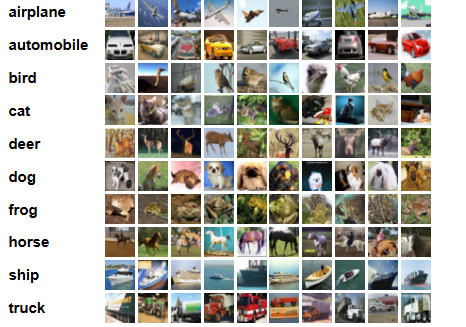

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


* The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

* Here are the classes in the dataset, as well as 10 random images from each:
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

* The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [ ]:
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

# Define the data transform for Data Augmentation
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomResizedCrop(32, scale=(0.8, 1.0), ratio=(1.0,1.0)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Load the data
# Training Data
trainset = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
trainloader = DataLoader(trainset, batch_size = 5, shuffle=True, num_workers=2)

# Test Data
testset = datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
testloader = DataLoader(testset, batch_size= 4, shuffle=False, num_workers=2)

# CIFAR-10 CLASSES
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print(len(trainset))
print(len(testset))

### 3. Hyperparameters Optimization

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr = 0.001)

### CNN Training

In [ ]:
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
  # Initialize per-epoch metrics
  epoch_train_loss = 0
  epoch_train_acc = 0

  model.train() # Set the model to training mode

  for i, (images, labels) in enumerate(trainloader):
    # Move images and labels to the same device as the model
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Accumulate training loss and correct predictions
    epoch_train_loss += loss.item()

    _, predicted = torch.max(outputs, 1)
    epoch_train_acc += (predicted == labels).float().mean()

  # Calculate average training loss and accuracy for the epoch
  epoch_train_loss  /= (i+1)
  epoch_train_acc /= (i+1)

  # Print training loss and accuracy for the epoch


  print('Epoch {}: Train Loss: {:.4f}, Train Acc: {:.4f}'.format(epoch+1, epoch_train_loss, epoch_train_acc
  ))

Epoch 2: Train Loss: 1.3769, Train Acc: 0.5076


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c0216d163e0>
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7c0216d163e0>    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
        if w.is_alive():self._shutdown_workers()
 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
     if w.is_alive(): 
      ^ ^ ^ ^^ ^^^^^^^^^^^^^^
^^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^

   File "/usr/lib/pytho

Epoch 3: Train Loss: 1.3083, Train Acc: 0.5347


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c0216d163e0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c0216d163e0>Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

    Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
        if w.is_alive():self._shutdown_workers()

   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
      if w.is_alive(): 
      ^ ^ ^ ^^ ^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^  
    File "/usr/lib/py

5. Test Model

In [ ]:
model.eval() # Set the model to evaluation mode
# Validate the model on the Test Set
with torch.no_grad():   # Context manager to disable gradient calculation
    correct = 0   # Initialize variable to count correct predictions
    total = 0   # Initialize variable to count total number of samples
    for images, labels in testloader:   # Iterate over the test loader
        outputs = model(images)   # Forward pass: compute model predictions
        _, predicted = torch.max(outputs.data, 1)   # Get the index of the class with the highest probability
        total += labels.size(0)   # Increment the total count by the batch size
        correct += (predicted == labels).sum().item()   # Count the number of correct predictions in the batch

    # Print the accuracy of the model on the Test Images
    print(f'Accuracy of the network on the validation images: {100 * correct / total} %')